In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
import pandas as pd
import math
#df=pd.read_csv("D:\Thesis\messy work\Final.csv")
#df['TURBIDITY']=pd.to_numeric(df['TURBIDITY'],errors='coerce')         #NEW
#df['Labels']=df.Labels.astype(float)                                   #NEW  
#df=df[['TEMPL','PHL','EC','CHLORIDE','TALKAL','TURBIDITY','DO','BOD','Labels']]
#print(df.dtypes)
#XRaw=np.array(df)
#XRaw=np.random.permutation(XRaw)
#pan=pd.DataFrame(XRaw)
#pan.to_csv("D:\Thesis\messy work\ReadyForDeploy.csv")

df=pd.read_csv("D:\Thesis\messy work\ReadyData.csv")
df=df[['0','1','2','3','4','5','6','7','8']]
#print(df.head())
#print(df.dtypes)
XRaw=np.array(df)
#print(XRaw.shape)

In [14]:
def norm(X):
    meanAr=np.mean(X,axis=1)
    meanAr=np.reshape(meanAr,(meanAr.shape[0],1))
    varAr=np.var(X,axis=1)
    varAr=np.reshape(varAr,(varAr.shape[0],1))
    stDev=np.sqrt(np.add(varAr,1e-8))
    normX=np.divide(np.subtract(X,meanAr),stDev)
    return normX,meanAr,stDev

def normRet(X,XTrainMean,XTrainStd):
    normX=np.divide(np.subtract(X,XTrainMean),XTrainStd)
    return normX

def oneHot(labels,C):
    C=tf.constant(C)
    oneHotMat=tf.one_hot(labels,C,axis=0)
    sess=tf.Session()
    oneHot=sess.run(oneHotMat)
    sess.close()
    return oneHot

Val=XRaw[0:100,:]
Test=XRaw[100:200,:]
Train=XRaw[200:-1,:]
#print(Train.shape)
XTrainR=np.transpose(Train[:,0:-1])
XTrain,Xmean,XStd=norm(XTrainR)
YTrain=Train[:,-1]
YTrain=np.transpose(YTrain)    #No need to reshape as one_hot handles the the missing dimension automatically
YTrain=oneHot(YTrain,10)

XTestR=np.transpose(Test[:,0:-1])
XTest=normRet(XTestR,Xmean,XStd)
YTest=Test[:,-1]
YTest=np.transpose(YTest)
YTest=oneHot(YTest,10)

XValR=np.transpose(Val[:,0:-1])
XVal=normRet(XValR,Xmean,XStd)
YVal=Val[:,-1]
YVal=np.transpose(YVal)
YVal=oneHot(YVal,10)


In [15]:
#print(XTrainR)
#XTurbi=XTrainR[-3,:]
#meanAr=np.mean(XTurbi,axis=1)
#meanAr=np.reshape(meanAr,(meanAr.shape[0],1))
#print(meanAr)

#print(XTurbinor,Xmean,Xvar)
print(XTrainR,XTrainR.shape)
print(YTrain,YTrain.shape)
print(XTrain,XTrain.shape)

[[  2.90000000e+01   2.90000000e+01   2.92000000e+01 ...,   2.80000000e+01
    2.90000000e+01   3.00000000e+01]
 [  7.12000000e+00   7.50000000e+00   6.74000000e+00 ...,   6.60000000e+00
    6.95000000e+00   7.10000000e+00]
 [  5.40000000e+02   2.52000000e+02   1.50000000e+02 ...,   5.10000000e+02
    3.05000000e+02   2.72000000e+02]
 ..., 
 [  6.00000000e+00   3.50000000e+01   8.00000000e+00 ...,   2.50000000e+01
    6.00000000e+00   4.50000000e+00]
 [  4.20000000e+00   5.60000000e+00   6.20000000e+00 ...,   6.30000000e+00
    3.40000000e+00   6.00000000e+00]
 [  8.00000000e+00   3.10000000e+00   1.40000000e+00 ...,   3.00000000e-01
    8.00000000e+00   2.80000000e+00]] (8, 3793)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (10, 3793)
[[ 0.49884068  0.49884068  0.57270809 ...,  0.12950362  0.49884068
   0.86817775]
 [-0.23782903  0.

In [16]:
def createPlace(nX,nY):
    X=tf.placeholder(tf.float32,shape=(nX,None))
    Y=tf.placeholder(tf.float32,shape=(nY,None))
    return X,Y

def initParameters():
    W1 = tf.get_variable("W1",[40,8],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b1 = tf.get_variable("b1",[40,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W2 = tf.get_variable("W2",[50,40],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b2 = tf.get_variable("b2",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W3 = tf.get_variable("W3",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b3 = tf.get_variable("b3",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W4 = tf.get_variable("W4",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b4 = tf.get_variable("b4",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W5 = tf.get_variable("W5",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b5 = tf.get_variable("b5",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W6 = tf.get_variable("W6",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b6 = tf.get_variable("b6",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W7 = tf.get_variable("W7",[40,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b7 = tf.get_variable("b7",[40,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W8 = tf.get_variable("W8",[35,40],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b8 = tf.get_variable("b8",[35,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W9 = tf.get_variable("W9",[25,35],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b9 = tf.get_variable("b9",[25,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W10 = tf.get_variable("W10",[10,25],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b10 = tf.get_variable("b10",[10,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5,
                  "W6": W6,
                  "b6": b6,
                  "W7": W7,
                  "b7": b7,
                  "W8": W8,
                  "b8": b8,
                  "W9": W9,
                  "b9": b9,
                  "W10": W10,
                  "b10": b10,}
                  
    return parameters

def forward(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    W7 = parameters['W7']
    b7 = parameters['b7']
    W8 = parameters['W8']
    b8 = parameters['b8']
    W9 = parameters['W9']
    b9 = parameters['b9']
    W10 = parameters['W10']
    b10 = parameters['b10']

    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)
    A5 = tf.nn.relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5),b6)
    A6 = tf.nn.relu(Z6)
    Z7 = tf.add(tf.matmul(W7,A6),b7)
    A7 = tf.nn.relu(Z7)
    Z8 = tf.add(tf.matmul(W8,A7),b8)
    A8 = tf.nn.relu(Z8)
    Z9 = tf.add(tf.matmul(W9,A8),b9)
    A9 = tf.nn.relu(Z9)
    Z10 = tf.add(tf.matmul(W10,A9),b10)
    
    return Z10















def compCost(Z10,Y):
    logits=tf.transpose(Z10)
    labels=tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost



In [19]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[1]                  
    mini_batches = []
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,(k*mini_batch_size):((k+1)*mini_batch_size)]
        mini_batch_Y = shuffled_Y[:,(k*mini_batch_size):((k+1)*mini_batch_size)]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,(num_complete_minibatches*mini_batch_size):m+1]
        mini_batch_Y = shuffled_Y[:,(num_complete_minibatches*mini_batch_size):m+1]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def model(XTrainR,YTrain,XValR,YVal,learning_rate=.001,minibatch_size=64,num_epochs=1000,print_cost=True):
    ops.reset_default_graph()
    (nX,m)=XTrainR.shape
    nY=YTrain.shape[0]
    costs=[]
    
    X,Y=createPlace(nX,nY)
    parameters=initParameters()
    Z10=forward(X,parameters)
    cost=compCost(Z10,Y)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        #print(XTrainR)
        #print(YTrain)
        #print(XTrainR.shape)
        #print(YTrain.shape)
        for epoch in range(num_epochs+1):
            epoch_cost=0
            num_minibatches=int(m / minibatch_size)
            minibatches=random_mini_batches(XTrainR,YTrain,minibatch_size)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y)=minibatch
                
                _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost+=minibatch_cost/num_minibatches
                #print(epoch_cost)
            if print_cost == True and epoch % 100 == 0:
                    print ("Cost after epoch %i: %f" % (epoch,epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                    costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction=tf.equal(tf.argmax(Z10),tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:",accuracy.eval({X:XTrainR,Y:YTrain}))
        print ("Test Accuracy:", accuracy.eval({X:XValR,Y:YVal}))

        return parameters



Cost after epoch 0: 2.298363
Cost after epoch 100: 2.074776
Cost after epoch 200: 1.808081
Cost after epoch 300: 1.670542
Cost after epoch 400: 1.565447
Cost after epoch 500: 1.482996
Cost after epoch 600: 1.392516
Cost after epoch 700: 1.287282
Cost after epoch 800: 1.197286
Cost after epoch 900: 1.134582
Cost after epoch 1000: 1.086370
Cost after epoch 1100: 1.047583
Cost after epoch 1200: 1.014044
Cost after epoch 1300: 0.986838
Cost after epoch 1400: 0.961686
Cost after epoch 1500: 0.939786
Cost after epoch 1600: 0.917600
Cost after epoch 1700: 0.897284
Cost after epoch 1800: 0.879127
Cost after epoch 1900: 0.861733
Cost after epoch 2000: 0.845773
Cost after epoch 2100: 0.828615
Cost after epoch 2200: 0.813443
Cost after epoch 2300: 0.798490
Cost after epoch 2400: 0.785490
Cost after epoch 2500: 0.773221
Cost after epoch 2600: 0.760055
Cost after epoch 2700: 0.747164
Cost after epoch 2800: 0.736376
Cost after epoch 2900: 0.723526
Cost after epoch 3000: 0.713418
Cost after epoch 310

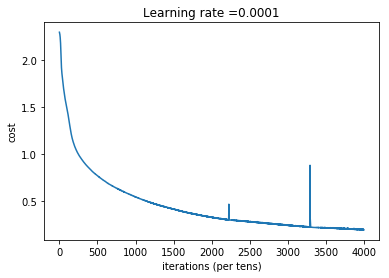

Parameters have been trained!
Train Accuracy: 0.935671
Test Accuracy: 0.42


In [10]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0001,num_epochs=20000,print_cost=True)

Cost after epoch 0: 2.295724
Cost after epoch 100: 2.053324
Cost after epoch 200: 1.767899
Cost after epoch 300: 1.595532
Cost after epoch 400: 1.432939
Cost after epoch 500: 1.310560
Cost after epoch 600: 1.220676
Cost after epoch 700: 1.148171
Cost after epoch 800: 1.091722
Cost after epoch 900: 1.040939
Cost after epoch 1000: 1.001794
Cost after epoch 1100: 0.967127
Cost after epoch 1200: 0.935886
Cost after epoch 1300: 0.907161
Cost after epoch 1400: 0.879529
Cost after epoch 1500: 0.851614
Cost after epoch 1600: 0.826210
Cost after epoch 1700: 0.802719
Cost after epoch 1800: 0.781009
Cost after epoch 1900: 0.760495
Cost after epoch 2000: 0.742320
Cost after epoch 2100: 0.725291
Cost after epoch 2200: 0.710069
Cost after epoch 2300: 0.695846
Cost after epoch 2400: 0.681997
Cost after epoch 2500: 0.670288
Cost after epoch 2600: 0.657197
Cost after epoch 2700: 0.646668
Cost after epoch 2800: 0.635228
Cost after epoch 2900: 0.624611
Cost after epoch 3000: 0.614226
Cost after epoch 310

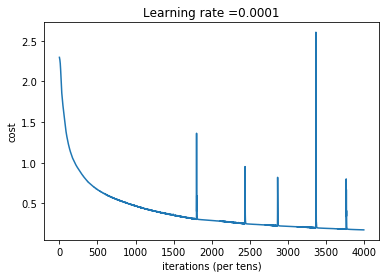

Parameters have been trained!
Train Accuracy: 0.947799
Test Accuracy: 0.67


In [8]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0001,num_epochs=20000,print_cost=True)


Cost after epoch 0: 2.290926
Cost after epoch 100: 2.039756
Cost after epoch 200: 1.828624
Cost after epoch 300: 1.705487
Cost after epoch 400: 1.665467
Cost after epoch 500: 1.631157
Cost after epoch 600: 1.594634
Cost after epoch 700: 1.558595
Cost after epoch 800: 1.530413
Cost after epoch 900: 1.505132
Cost after epoch 1000: 1.484410
Cost after epoch 1100: 1.466384
Cost after epoch 1200: 1.449804
Cost after epoch 1300: 1.433668
Cost after epoch 1400: 1.419345
Cost after epoch 1500: 1.407423
Cost after epoch 1600: 1.396970
Cost after epoch 1700: 1.387273
Cost after epoch 1800: 1.378060
Cost after epoch 1900: 1.369416
Cost after epoch 2000: 1.361751
Cost after epoch 2100: 1.354396
Cost after epoch 2200: 1.347545
Cost after epoch 2300: 1.341040
Cost after epoch 2400: 1.333176
Cost after epoch 2500: 1.325452
Cost after epoch 2600: 1.316980
Cost after epoch 2700: 1.310486
Cost after epoch 2800: 1.302593
Cost after epoch 2900: 1.296239
Cost after epoch 3000: 1.290396
Cost after epoch 310

Cost after epoch 25200: 0.936072
Cost after epoch 25300: 0.935798
Cost after epoch 25400: 0.942094
Cost after epoch 25500: 0.934352
Cost after epoch 25600: 0.934291
Cost after epoch 25700: 0.936097
Cost after epoch 25800: 0.936125
Cost after epoch 25900: 0.931887
Cost after epoch 26000: 0.931002
Cost after epoch 26100: 0.936894
Cost after epoch 26200: 0.932880
Cost after epoch 26300: 0.936850
Cost after epoch 26400: 0.931209
Cost after epoch 26500: 0.930224
Cost after epoch 26600: 0.940133
Cost after epoch 26700: 0.929229
Cost after epoch 26800: 0.932522
Cost after epoch 26900: 0.926495
Cost after epoch 27000: 0.924192
Cost after epoch 27100: 0.924980
Cost after epoch 27200: 0.924394
Cost after epoch 27300: 0.924628
Cost after epoch 27400: 0.922713
Cost after epoch 27500: 0.921190
Cost after epoch 27600: 0.920394
Cost after epoch 27700: 0.920476
Cost after epoch 27800: 0.921569
Cost after epoch 27900: 0.920505
Cost after epoch 28000: 0.925474
Cost after epoch 28100: 0.918822
Cost after

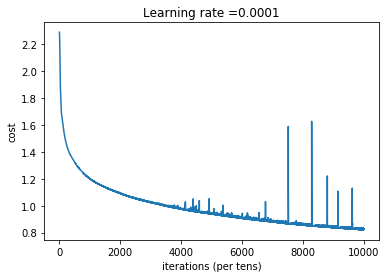

Parameters have been trained!
Train Accuracy: 0.703743
Test Accuracy: 0.61


In [35]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0001,num_epochs=50000,print_cost=True)

Cost after epoch 0: 2.327060
Cost after epoch 100: 1.327342
Cost after epoch 200: 1.187992
Cost after epoch 300: 1.087046
Cost after epoch 400: 1.005912
Cost after epoch 500: 0.945374
Cost after epoch 600: 0.887432
Cost after epoch 700: 0.838098
Cost after epoch 800: 0.803732
Cost after epoch 900: 0.768779
Cost after epoch 1000: 0.740640
Cost after epoch 1100: 0.704277
Cost after epoch 1200: 0.681524
Cost after epoch 1300: 0.656314
Cost after epoch 1400: 0.635213
Cost after epoch 1500: 0.603853
Cost after epoch 1600: 0.584445
Cost after epoch 1700: 0.562243
Cost after epoch 1800: 0.555067
Cost after epoch 1900: 0.532365
Cost after epoch 2000: 0.499618
Cost after epoch 2100: 0.488316
Cost after epoch 2200: 0.474829
Cost after epoch 2300: 0.460635
Cost after epoch 2400: 0.441384
Cost after epoch 2500: 0.429620
Cost after epoch 2600: 0.440186
Cost after epoch 2700: 0.403876
Cost after epoch 2800: 0.388554
Cost after epoch 2900: 0.383841
Cost after epoch 3000: 0.364514
Cost after epoch 310

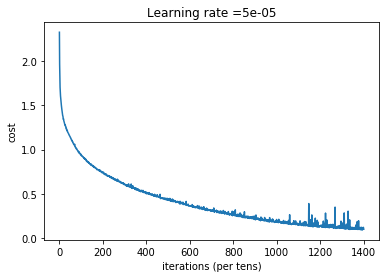

Parameters have been trained!
Train Accuracy: 0.955444
Test Accuracy: 0.71


In [21]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.00005,minibatch_size=64,num_epochs=7000,print_cost=True)

Cost after epoch 0: 2.184483
Cost after epoch 100: 0.624512
Cost after epoch 200: 0.348579
Cost after epoch 300: 0.194200
Cost after epoch 400: 0.182607
Cost after epoch 500: 0.204535
Cost after epoch 600: 0.059076
Cost after epoch 700: 0.168316
Cost after epoch 800: 0.173419
Cost after epoch 900: 0.130446
Cost after epoch 1000: 0.040044


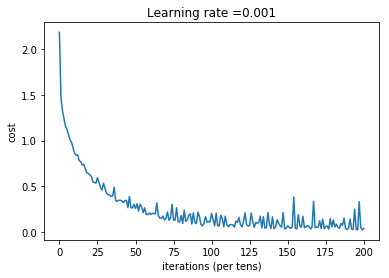

Parameters have been trained!
Train Accuracy: 0.98339
Test Accuracy: 0.79


In [22]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.001,minibatch_size=64,num_epochs=1000,print_cost=True)